# What is the Problem Statement

To predict future ODI cricket match winner based on previous year's match result

I am intrusted in 2010 to 2021 data only as this is more recent

# Dataset Desciption

Dataset folder contains following file:

>`ODI-data-1971-2017.csv` having `3932 rows x 7 columns`<br>
Columns Provided in Dataset

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date


>`ODI-data-2017-2021.csv` having `495 x 8 columns`<br>
Columns Provided in Dataset

1. Scorecard
2. Team 1
3. Team 2
4. Winner
5. Margin
6. Ground
7. Match Date
8. Unnamed: 0

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/odi-cricket-match-data/ODI-Data-2017-2021.csv
/kaggle/input/odi-cricket-match-data/ODI-data-1971-2017-2.csv


In [2]:
# importing necessary libraries
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading datasets ODI_data_1971_2017 and ODI_data_2017_2021
data_1971_2017 = pd.read_csv('/kaggle/input/odi-cricket-match-data/ODI-data-1971-2017-2.csv')
data_2017_2021 = pd.read_csv('/kaggle/input/odi-cricket-match-data/ODI-Data-2017-2021.csv')

In [4]:
# ODI_data_1971_2017 data
data_1971_2017.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [5]:
# ODI_data_2017_2021 data
data_2017_2021.head()

,Unnamed: 0,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,0,ODI # 3817,Australia,Pakistan,Australia,92 runs,Brisbane,"Jan 13, 2017"
1,1,ODI # 3818,Australia,Pakistan,Pakistan,6 wickets,Melbourne,"Jan 15, 2017"
2,2,ODI # 3819,India,England,India,3 wickets,Pune,"Jan 15, 2017"
3,3,ODI # 3820,Australia,Pakistan,Australia,7 wickets,Perth,"Jan 19, 2017"
4,4,ODI # 3821,India,England,India,15 runs,Cuttack,"Jan 19, 2017"


In [6]:
data_1971_2017.shape, data_2017_2021.shape

((3932, 7), (495, 8))

8th column is `Unnamed: 0` of no use this is index, so droping it

In [7]:
data_2017_2021.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data_1971_2017.nunique()

Scorecard     3932
Team 1          24
Team 2          25
Winner          25
Margin         227
Ground         173
Match Date    3386
dtype: int64

In [9]:
data_2017_2021.nunique()

Scorecard     495
Team 1         21
Team 2         20
Winner         23
Margin        158
Ground        100
Match Date    408
dtype: int64

In [10]:
data_1971_2017['Match Date'].unique()

array(['Jan 5, 1971', 'Aug 24, 1972', 'Aug 26, 1972', ..., 'Oct 23, 2017',
       'Oct 25, 2017', 'Oct 29, 2017'], dtype=object)

In [11]:
data_2017_2021['Match Date'].unique()

array(['Jan 13, 2017', 'Jan 15, 2017', 'Jan 19, 2017', 'Jan 22, 2017',
       'Jan 24, 2017', 'Jan 26, 2017', 'Jan 28, 2017', 'Jan 30, 2017',
       'Feb 1, 2017', 'Feb 4, 2017', 'Feb 5, 2017', 'Feb 7, 2017',
       'Feb 10, 2017', 'Feb 16, 2017', 'Feb 19, 2017', 'Feb 21, 2017',
       'Feb 22, 2017', 'Feb 24, 2017', 'Feb 25, 2017', 'Feb 26, 2017',
       'Mar 1, 2017', 'Mar 2, 2017', 'Mar 3, 2017', 'Mar 4, 2017',
       'Mar 5, 2017', 'Mar 9, 2017', 'Mar 15, 2017', 'Mar 17, 2017',
       'Mar 19, 2017', 'Mar 22, 2017', 'Mar 24, 2017', 'Mar 25, 2017',
       'Mar 28, 2017', 'Mar 31, 2017', 'Apr 1, 2017', 'Apr 2, 2017',
       'Apr 4, 2017', 'Apr 7, 2017', 'Apr 9, 2017', 'Apr 11, 2017',
       'May 5, 2017', 'May 7, 2017', 'May 12, 2017', 'May 14, 2017',
       'May 17, 2017', 'May 19, 2017', 'May 21, 2017', 'May 24, 2017',
       'May 27, 2017', 'May 29, 2017', 'Jun 1, 2017', 'Jun 2, 2017',
       'Jun 3, 2017', 'Jun 4, 2017', 'Jun 5, 2017', 'Jun 6, 2017',
       'Jun 7, 2017', 'Jun 8,

Trying to drop rows of `year 2017` present in `data_2017_2021` wich are alredy present in `data_1971_2017` as we are concerned about data between 2010 t0 2021

`I have to concat both data to get data from 2010 to 2021`

In [12]:
# droping rows with index range 0 to 116, reset index and drop old index of data
data_2017_2021 = data_2017_2021.drop(range(0,116))
data_2017_2021.reset_index(inplace=True,drop=True)

In [13]:
# loading data_1971_2021 dataset
data_1971_2021 = pd.concat([data_1971_2017,data_2017_2021],ignore_index=True)

In [14]:
# droping values from 0 to 2936 as these are all samples before year 2010
# Storing all remaining samples in new dataframe
data_2010_2021 = data_1971_2021.drop(range(0,2936),axis=0)

# reseting index 
data_2010_2021.reset_index(inplace=True,drop=True)

In [15]:
data_2010_2021.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010"
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010"
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010"
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010"
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010"


# EDA

In [16]:
# all column names
data_2010_2021.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date'],
      dtype='object')

In [17]:
# info of complete dataset
data_2010_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   1375 non-null   object
 1   Team 1      1375 non-null   object
 2   Team 2      1375 non-null   object
 3   Winner      1375 non-null   object
 4   Margin      1326 non-null   object
 5   Ground      1375 non-null   object
 6   Match Date  1375 non-null   object
dtypes: object(7)
memory usage: 75.3+ KB


Observe you will see 
* `object` -> String values  ==> All columns are of string datatype

In [18]:
# information like total count in every columns
data_2010_2021.describe()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
count,1375,1375,1375,1375,1326,1375,1375
unique,1375,23,23,25,213,124,1150
top,ODI # 2937,England,Pakistan,India,6 wickets,Dhaka,"Mar 6, 2018"
freq,1,141,175,164,126,87,4


In [19]:
# printing len of datset, which tells total number of samples in dataset
len(data_2010_2021)

1375

In [20]:
# count of unique values of each column
data_2010_2021.nunique()

Scorecard     1375
Team 1          23
Team 2          23
Winner          25
Margin         213
Ground         124
Match Date    1150
dtype: int64

In [21]:
# missing values in all columnns of dataset
data_2010_2021.isnull().sum()

Scorecard      0
Team 1         0
Team 2         0
Winner         0
Margin        49
Ground         0
Match Date     0
dtype: int64

Observe there are missing values in the `Margin` column of dataset

# Chi-square Test



In [22]:
# importing necessary libraries needed for performing Chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# function for performing chi-square test
def applying_chiSquare_test(col1,col2):
    # contingency table
    contingency_table = pd.crosstab(data_2010_2021[col1],data_2010_2021[col2])
    # observed values
    observed_values = contingency_table.values
    # expected values
    chi2_contingency_val = chi2_contingency(contingency_table)
    expected_values = chi2_contingency_val[3]
    # degree of freedom
    rows_number = len(contingency_table.iloc[0:,0])
    columns_number = len(contingency_table.iloc[0,0:])
    degree_of_freedom = (rows_number-1)*(columns_number-1)
    print(f'Degree Of Freedom: {degree_of_freedom}')
    # significance level 5%
    alpha = 0.05
    print(f'Significance Level: {alpha}')
    # chi_square statistic
    chi_square = sum([(od_V-ex_V)**2./ex_V for od_V,ex_V in zip(observed_values,expected_values)])
    chi_square_stats = chi_square[0] + chi_square[1]
    print(f'Chi Square Statistic: {chi_square_stats}')
    # critical_value
    critical_value = chi2.ppf(q=1 - alpha,df=degree_of_freedom)
    print(f'Critical Value: {critical_value}')
    # p-value
    p_value = 1 - chi2.cdf(x=chi_square_stats,df=degree_of_freedom)
    print(f'p-value: {p_value}')
    
    # checking condition based on chi_square_statistic and critical value for hypothesis rejection     
    if chi_square_stats >= critical_value:
        print('Reject H0,There is a relationship between 2 categorical variables')
    else:
        print('Reject H0,There is no relationship between 2 categorical variables')
       
    # checking condition based on p value and alpha for hypothesis rejection  
    if p_value <= alpha:
        print('Reject H0,There is a relationship between 2 categorical variables')
    else:
        print('Reject H0,There is no relationship between 2 categorical variables')
        
'''-----------------------------------------------'''       

# looping on whole dataset for performing chi-square test
for col1 in data_2010_2021.columns:
    
    # inner loop on whole dataset columns name
    for col2 in data_2010_2021.columns:

        # condition check if both column names are not equal
        if col1 != col2:
            print(f"Chi_Square Test On =>> [{col1,col2}]\n")
            # passing both column names to chi-sqaure performance function
            applying_chiSquare_test(col1,col2)
            print('----'*16,'\n')

Chi_Square Test On =>> [('Scorecard', 'Team 1')]

Degree Of Freedom: 30228
Significance Level: 0.05
Chi Square Statistic: 2549.9999999999623
Critical Value: 30633.567183419527
p-value: 1.0
Reject H0,There is no relationship between 2 categorical variables
Reject H0,There is no relationship between 2 categorical variables
---------------------------------------------------------------- 

Chi_Square Test On =>> [('Scorecard', 'Team 2')]

Degree Of Freedom: 30228
Significance Level: 0.05
Chi Square Statistic: 2592.0000000000355
Critical Value: 30633.567183419527
p-value: 1.0
Reject H0,There is no relationship between 2 categorical variables
Reject H0,There is no relationship between 2 categorical variables
---------------------------------------------------------------- 

Chi_Square Test On =>> [('Scorecard', 'Winner')]

Degree Of Freedom: 32976
Significance Level: 0.05
Chi Square Statistic: 2557.000000000013
Critical Value: 33399.55082702824
p-value: 1.0
Reject H0,There is no relationshi

# Dendrogram


In [23]:
# importing scipy
import scipy
# importing hierarchy from skleanr.cluster
from scipy.cluster import hierarchy

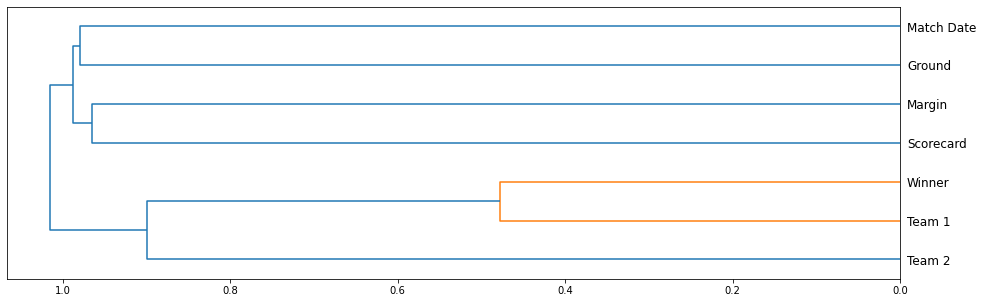

In [24]:
# Plot a Dendrogram on the columns of the dataset

# creating a varibake to store data_2010_2021 after dropin nan values
temp_data = data_2010_2021.dropna()

# createing corr variable to store correlation results
corr = np.round(scipy.stats.spearmanr(temp_data ).correlation,4)
# condensing corr variable
condensed_corr = hierarchy.distance.squareform(1-corr)
# passing condensed_corr variable to hierarchy linkage for getting average and then sorting it in new varibale
avg = hierarchy.linkage(condensed_corr,method='average')

# ploting a dendogram with values of new varibale just created above
fig = plt.figure(figsize=(16,5))
dendrogram = hierarchy.dendrogram(avg,labels=temp_data .columns,orientation='left')
plt.show()

Observe `Team1` and `Winner` are `strongly correlated variables`


In [25]:
data_2010_2021.isnull().sum()

Scorecard      0
Team 1         0
Team 2         0
Winner         0
Margin        49
Ground         0
Match Date     0
dtype: int64

Margin have 49 null values
* I am droping these empty rows 
    * as all of the data is categorical and if we replace missing values with random values it will affect correctness of prediction

In [26]:
# Droping rows with missing values and reseting index of samples
data_2010_2021.dropna().reset_index(inplace=True)


In [27]:
data_2010_2021.Winner.unique()

array(['Sri Lanka', 'India', 'Australia', 'New Zealand', 'no result',
       'Kenya', 'Afghanistan', 'Netherlands', 'Canada', 'South Africa',
       'England', 'Zimbabwe', 'West Indies', 'Pakistan', 'Ireland',
       'Scotland', 'Bangladesh', 'tied', 'U.A.E.', 'P.N.G.', 'Hong Kong',
       'Nepal', 'Namibia', 'Oman', 'U.S.A.'], dtype=object)

In [28]:
data_2010_2021.Winner.value_counts()

India           164
Australia       133
England         133
South Africa    120
Sri Lanka       118
Pakistan        108
New Zealand     104
Bangladesh       81
West Indies      76
Afghanistan      60
Ireland          54
no result        48
Zimbabwe         44
Scotland         33
Netherlands      16
U.A.E.           16
tied             15
Hong Kong         9
Oman              8
Kenya             7
P.N.G.            7
U.S.A.            6
Canada            5
Nepal             5
Namibia           5
Name: Winner, dtype: int64

Observe there are some values as `no result` 10 times and `tied` 4 times

In [29]:
# Filtering out rows which contain winner column values as 'no result' and 'tied'
data_2010_2021 = data_2010_2021[(data_2010_2021.Winner != 'no result') & (data_2010_2021.Winner != 'tied')]
# reseting index of samples and droping extra "index" column from dataset
data_2010_2021.reset_index().drop(['index'],axis=1,inplace=True)

# Feature Engineering -1
The most important step in workflow of machine learning
* ML model work well if data provided to model is relevant and useful

In [30]:
data_2010_2021.Margin.unique()

array(['7 wickets', '5 wickets', '6 wickets', '9 wickets', '8 wickets',
       '4 wickets', '140 runs', '40 runs', '135 runs', '2 wickets',
       '146 runs', '113 runs', '3 wickets', '50 runs', '1 run', '80 runs',
       '125 runs', '153 runs', '90 runs', '2 runs', '45 runs', '12 runs',
       '141 runs', '51 runs', '208 runs', '66 runs', '17 runs', '67 runs',
       '1 wicket', '16 runs', '39 runs', '126 runs', '139 runs',
       '81 runs', '78 runs', '69 runs', '117 runs', '42 runs', '6 runs',
       '5 runs', '144 runs', '200 runs', '70 runs', '105 runs', '74 runs',
       '4 runs', '92 runs', '24 runs', '23 runs', '38 runs', '121 runs',
       '20 runs', '9 runs', '64 runs', '3 runs', '272 runs', '29 runs',
       '57 runs', '65 runs', '46 runs', '48 runs', '33 runs', '21 runs',
       '43 runs', '41 runs', '26 runs', '87 runs', '10 wickets',
       '210 runs', '91 runs', '205 runs', '27 runs', '11 runs',
       '175 runs', '215 runs', '231 runs', '110 runs', '44 runs',
       '97

In [31]:
data_2010_2021.Margin.dtype

dtype('O')

**`Trying to break down `Margin` column which is Object data type into two columns named `won_by_runs` and `won_by_wickets` both as numerical datatype int64`**

In [32]:
for element in data_2010_2021.Margin:
    e = element

In [33]:
e

'6 wickets'

Observe there is space between number and words[43 runs] or [3 wickets], I am trying to split the on basis of space

In [34]:
for element in data_2010_2021.Margin:
    num_word_split_data = element.split(' ')
    

In [35]:
num_word_split_data

['6', 'wickets']

In [36]:
# creating a list for storing runs
won_by_runs = []
# creating a list for storing wickets
won_by_wickets = []
# looping through dataset column Margin
for element in data_2010_2021.Margin:
# splitting string data by space and making a list
    num_word_split_data = element.split(' ')
    
    ### Exception handling #####
    try:    
    # searching for index of "run" in string, after success index of "run" will be stored in index variable 
        run_index_search = num_word_split_data.index('run')
    # appending first element from splitted data after converting to integer to won by run list created before looping 
        won_by_runs.append(int(num_word_split_data[run_index_search-1]))
    # appending 0 from splitted data to won by wicket list created before looping
        won_by_wickets.append(0)
    except:
    # if failed --> print("run_index_search_failes")
        #print('---run_index_search_failes---')
        pass

  ### Exceptin handling ###
    try:
    # searching for index of "runs" in string, after success index of "runs" will be stored in index variable 
        runs_index_search = num_word_split_data.index('runs')
    # appending first element from splitted data after converting to integer to won by run list created before looping 
        won_by_runs.append(int(num_word_split_data[runs_index_search-1]))
    # appending 0 from splitted data to won by wicket list created before looping
        won_by_wickets.append(0)
    except:
    # if failed --> print("runs_index_search_failes")
        #print('---runs_index_search_failes---')
        pass
    

  ### Exceptin handling ###
    try:
    # searching for index of "wicket" in string, after success index of "wicket" will be stored in index variable 
        wicket_index_search = num_word_split_data.index('wicket')
    # appending first element from splitted data after converting to integer to won by wicket list created before looping 
        won_by_wickets.append(int(num_word_split_data[wicket_index_search-1]))
    # appending 0 from splitted data to won by run list created before looping
        won_by_runs.append(0)
    except:
    # if failed --> print("wicket_index_search_failes")
        #print('---wicket_index_search_failes---')
        pass
   

  ### Exceptin handling ###
    try:
    # searching for index of "wickets" in string, after success index of "wickets" will be stored in index variable 
        wickets_index_search = num_word_split_data.index('wickets')
    # appending first element from splitted data after converting to integer to won by wicket list created before looping 
        won_by_wickets.append(int(num_word_split_data[wickets_index_search-1]))
    # appending 0 from splitted data to won by run list created before looping
        won_by_runs.append(0)
    except:
    # if failed --> print("wickets_index_search_failes")
        #print('---wickets_index_search_failes---')
        pass


# adding a new column named 'won_by_runs' to Datframe with respectiev data list
data_2010_2021['Won_by_runs'] = won_by_runs
# adding a new column named 'won_by_wickets' to Datframe with respectiev data list
data_2010_2021['Won_by_wickets'] = won_by_wickets

In [37]:
data_2010_2021.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,Won_by_runs,Won_by_wickets
0,ODI # 2937,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka,"Jan 4, 2010",0,7
1,ODI # 2938,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka,"Jan 5, 2010",0,5
2,ODI # 2939,Bangladesh,India,India,6 wickets,Dhaka,"Jan 7, 2010",0,6
3,ODI # 2940,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka,"Jan 8, 2010",0,9
4,ODI # 2941,India,Sri Lanka,India,8 wickets,Dhaka,"Jan 10, 2010",0,8


# Feature Engineering -2 
* Trying to find out which team bolled first and wise versa


Trying to Extract `Team1_batted_first` and `Team2_batted_first` column data from `Won_by_runs` and `Won_by_wickets` columns

**`Domain knowledge:`**<br>
* if team wins by wickets means => team got first chance to bowl
* if team wins by runs means => team got first chance to batt

<h2><center>Work In Progress</center></h2>

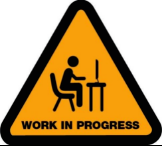
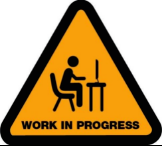

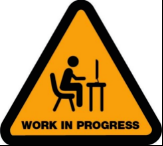